## Prediction of cancer using Artifical Neural Network Model

-  **Objective :** This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to **classify whether the breast cancer is benign or malignant**. To achieve this i have used **ANN classification methods** to fit a function that can predict the discrete class of new input.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


+ __Here there are 31 columns in our dataset out of which 'benign_0_mal_1' is our label and rest is features which will be used to predict the label class.__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

+ There is not any null values in the given data set

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

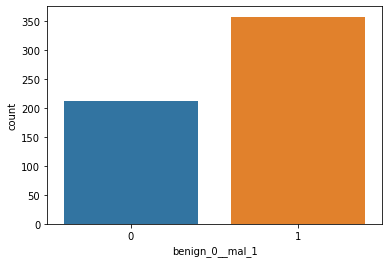

In [9]:
sns.countplot('benign_0__mal_1', data = df)

+ __There is class imbalance but it is in accaptable range__

<AxesSubplot:>

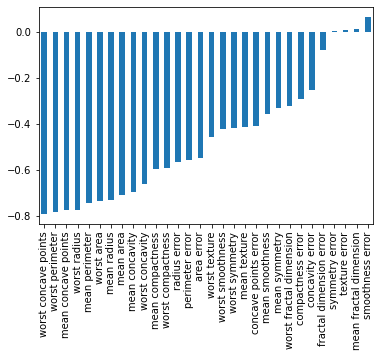

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

+ __Correlation of all features with label class, as we see that they negtively corelated hence it is a good problem for predicting thr class of label__

<AxesSubplot:>

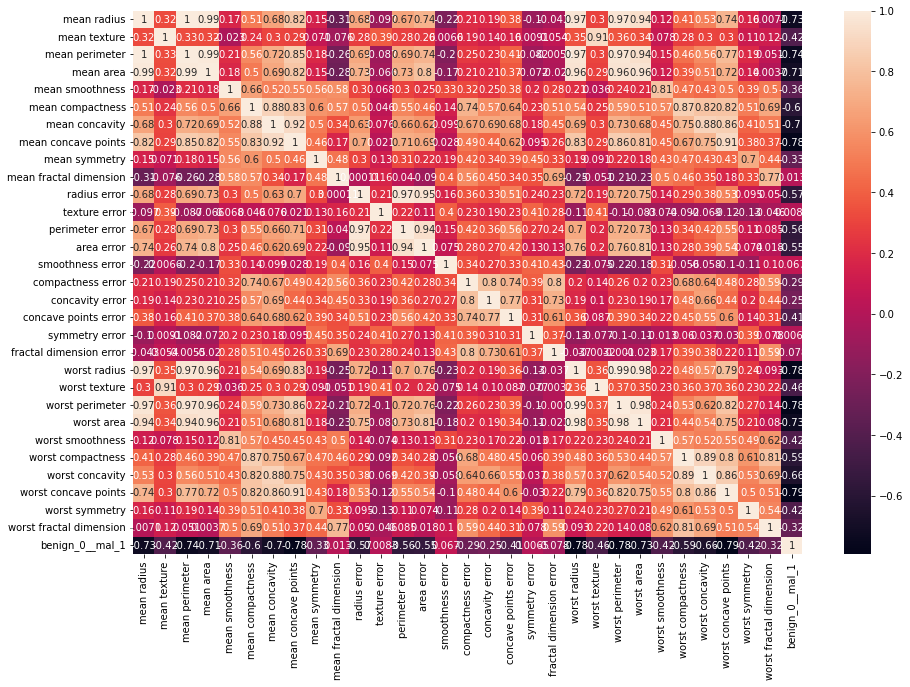

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

### Starting of modelling

In [17]:
X = df.drop('benign_0__mal_1', axis = 1) 
y = df['benign_0__mal_1']

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 30)

In [23]:
from sklearn.preprocessing import MinMaxScaler   # scaling the data in range of 1 and 0 to reduce the system efforts
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Use of Tensorflow to create Artificial Neural Network

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
X_train.shape

(381, 30)

In [28]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))   # Input layer
model.add(Dense(15, activation = 'relu'))   #Hiddein Layer
model.add(Dense(10, activation = 'relu'))   # Hidden layer

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))  # since it a binary classification problem hence using 'sigmoid' activation function

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [30]:
model.fit(x = X_train, y = y_train, epochs = 550, validation_data = (X_test, y_test))

Epoch 1/550
12/12 [==============================] - 3s 69ms/step - loss: 0.6790 - val_loss: 0.6663
Epoch 2/550
12/12 [==============================] - 0s 15ms/step - loss: 0.6509 - val_loss: 0.6372
Epoch 3/550
12/12 [==============================] - 0s 15ms/step - loss: 0.6173 - val_loss: 0.5979
Epoch 4/550
12/12 [==============================] - 0s 15ms/step - loss: 0.5761 - val_loss: 0.5505
Epoch 5/550
12/12 [==============================] - 0s 15ms/step - loss: 0.5241 - val_loss: 0.4904
Epoch 6/550
12/12 [==============================] - 0s 14ms/step - loss: 0.4644 - val_loss: 0.4243
Epoch 7/550
12/12 [==============================] - 0s 12ms/step - loss: 0.4051 - val_loss: 0.3651
Epoch 8/550
12/12 [==============================] - 0s 16ms/step - loss: 0.3485 - val_loss: 0.3097
Epoch 9/550
12/12 [==============================] - 0s 16ms/step - loss: 0.2994 - val_loss: 0.2599
Epoch 10/550
12/12 [==============================] - 0s 12ms/step - loss: 0.2575 - val_loss: 0.2283

12/12 [==============================] - 0s 10ms/step - loss: 0.0119 - val_loss: 0.1587
Epoch 163/550
12/12 [==============================] - 0s 11ms/step - loss: 0.0148 - val_loss: 0.1312
Epoch 164/550
12/12 [==============================] - 0s 10ms/step - loss: 0.0122 - val_loss: 0.1498
Epoch 165/550
12/12 [==============================] - 0s 11ms/step - loss: 0.0107 - val_loss: 0.1455
Epoch 166/550
12/12 [==============================] - 0s 11ms/step - loss: 0.0117 - val_loss: 0.1331
Epoch 167/550
12/12 [==============================] - 0s 10ms/step - loss: 0.0132 - val_loss: 0.1496
Epoch 168/550
12/12 [==============================] - 0s 10ms/step - loss: 0.0105 - val_loss: 0.1460
Epoch 169/550
12/12 [==============================] - 0s 10ms/step - loss: 0.0102 - val_loss: 0.1410
Epoch 170/550
12/12 [==============================] - 0s 10ms/step - loss: 0.0115 - val_loss: 0.1592
Epoch 171/550
12/12 [==============================] - 0s 11ms/step - loss: 0.0089 - val_loss: 0

12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.2496
Epoch 323/550
12/12 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.2727
Epoch 324/550
12/12 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.2489
Epoch 325/550
12/12 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 0.2670
Epoch 326/550
12/12 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 0.2509
Epoch 327/550
12/12 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 0.2698
Epoch 328/550
12/12 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.2603
Epoch 329/550
12/12 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 0.2561
Epoch 330/550
12/12 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.2648
Epoch 331/550
12/12 [==============================] - 0s 13ms/step - loss: 0.0015 - val_loss: 0

12/12 [==============================] - 0s 17ms/step - loss: 4.9383e-04 - val_loss: 0.3180
Epoch 480/550
12/12 [==============================] - 0s 13ms/step - loss: 5.3966e-04 - val_loss: 0.3154
Epoch 481/550
12/12 [==============================] - 0s 18ms/step - loss: 4.7505e-04 - val_loss: 0.3177
Epoch 482/550
12/12 [==============================] - 0s 18ms/step - loss: 4.7103e-04 - val_loss: 0.3198
Epoch 483/550
12/12 [==============================] - 0s 18ms/step - loss: 5.2614e-04 - val_loss: 0.3185
Epoch 484/550
12/12 [==============================] - 0s 18ms/step - loss: 5.0510e-04 - val_loss: 0.3170
Epoch 485/550
12/12 [==============================] - 0s 13ms/step - loss: 4.6905e-04 - val_loss: 0.3222
Epoch 486/550
12/12 [==============================] - 0s 11ms/step - loss: 5.1022e-04 - val_loss: 0.3212
Epoch 487/550
12/12 [==============================] - 0s 11ms/step - loss: 4.2188e-04 - val_loss: 0.3156
Epoch 488/550
12/12 [==============================] - 0s 11

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

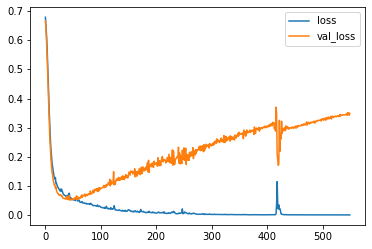

In [33]:
losses.plot()   #Overfitting

+ __It is the case of overfitting. Now to avoid this overfitting I am using two different methods:__
    + EarlyStopping Method
    + Dropout

### EarlyStopping Method

In [34]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping  # importing EarlyStopping

In [38]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [39]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [40]:
model.fit(x = X_train, y = y_train, epochs = 550, validation_data = (X_test, y_test),
         callbacks =[early_stop])

Epoch 1/550
12/12 [==============================] - 4s 73ms/step - loss: 0.6547 - val_loss: 0.6291
Epoch 2/550
12/12 [==============================] - 0s 19ms/step - loss: 0.6103 - val_loss: 0.5852
Epoch 3/550
12/12 [==============================] - 0s 21ms/step - loss: 0.5608 - val_loss: 0.5233
Epoch 4/550
12/12 [==============================] - 0s 35ms/step - loss: 0.4978 - val_loss: 0.4538
Epoch 5/550
12/12 [==============================] - 0s 39ms/step - loss: 0.4397 - val_loss: 0.3950
Epoch 6/550
12/12 [==============================] - 0s 33ms/step - loss: 0.3806 - val_loss: 0.3358
Epoch 7/550
12/12 [==============================] - 0s 18ms/step - loss: 0.3314 - val_loss: 0.2895
Epoch 8/550
12/12 [==============================] - 0s 19ms/step - loss: 0.2937 - val_loss: 0.2520
Epoch 9/550
12/12 [==============================] - 0s 15ms/step - loss: 0.2638 - val_loss: 0.2266
Epoch 10/550
12/12 [==============================] - 0s 21ms/step - loss: 0.2364 - val_loss: 0.2014

In [42]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

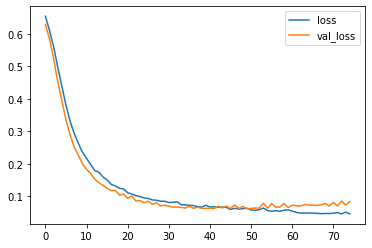

In [43]:
model_loss.plot()

+ It is just reduce the number of epochs when loss is less in both prediction as well as test dataset

### Combination of EarlyStopping and Dropout

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
### avoid overfitting

model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))  # Dropout: Half of weight and biases are not updated
model.add(Dense(15, activation = 'relu'))  # Half of neurons are turn off automatically
model.add(Dense(10, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

+ __Basically Dropout reduces the weights and biases and also make turn off the specified neural network.__

In [46]:
model.fit(x = X_train, y = y_train, epochs = 550, validation_data = (X_test, y_test),
         callbacks =[early_stop])

Epoch 1/550
12/12 [==============================] - 4s 76ms/step - loss: 0.7003 - val_loss: 0.6551
Epoch 2/550
12/12 [==============================] - 0s 16ms/step - loss: 0.6745 - val_loss: 0.6476
Epoch 3/550
12/12 [==============================] - 0s 16ms/step - loss: 0.6654 - val_loss: 0.6369
Epoch 4/550
12/12 [==============================] - 0s 17ms/step - loss: 0.6502 - val_loss: 0.6103
Epoch 5/550
12/12 [==============================] - 0s 16ms/step - loss: 0.6323 - val_loss: 0.5849
Epoch 6/550
12/12 [==============================] - 0s 16ms/step - loss: 0.6020 - val_loss: 0.5535
Epoch 7/550
12/12 [==============================] - 0s 16ms/step - loss: 0.5677 - val_loss: 0.5023
Epoch 8/550
12/12 [==============================] - 0s 31ms/step - loss: 0.5544 - val_loss: 0.4603
Epoch 9/550
12/12 [==============================] - 0s 16ms/step - loss: 0.5016 - val_loss: 0.4143
Epoch 10/550
12/12 [==============================] - 0s 15ms/step - loss: 0.4576 - val_loss: 0.3648

In [47]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

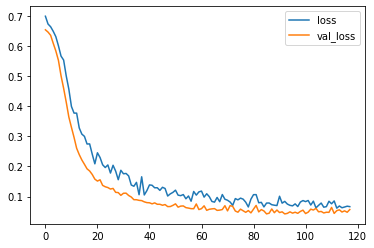

In [48]:
model_loss.plot()

+ __Adding Dropouts and callbacks(early_stoping) definately improve much more the performance.__

In [66]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions    ## Prediction of the model on the unseen data

6/6 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       0.97      1.00      0.99       116

    accuracy                           0.98       188
   macro avg       0.99      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [68]:
print(confusion_matrix(y_test, predictions))

[[ 69   3]
 [  0 116]]


In [70]:
print(accuracy_score(y_test, predictions)*100)

98.40425531914893


+ __Model is predicting the labels at almost 99% accuracy hence our model is very good.__

### Thank You